In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as data 
import yfinance as yf

In [2]:
startDate = '2010-01-01'
endDate = '2023-10-31'

ticker = 'AAPL'

df = yf.download('AAPL', startDate, endDate) # make dynamic with any user input
df.head()



[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478999,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375158,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-24,173.050003,173.669998,171.449997,173.440002,173.211807,43816600
2023-10-25,171.880005,173.059998,170.649994,171.100006,170.874893,57157000
2023-10-26,170.369995,171.380005,165.669998,166.889999,166.670425,70625300
2023-10-27,166.910004,168.960007,166.830002,168.220001,167.998672,58499100
2023-10-30,169.020004,171.169998,168.869995,170.289993,170.065933,51131000


In [4]:
df = df.reset_index(drop=True) #reseting index and droping Index
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,7.622500,7.660714,7.585000,7.643214,6.478999,493729600
1,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
3,7.562500,7.571429,7.466071,7.520714,6.375158,477131200
4,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [5]:
df = df.drop(['Adj Close'], axis=1) # I am removing columns that i don't want and won't be useful for my model rn
df.describe()

,Open,High,Low,Close,Volume
count,3480.000000,3480.000000,3480.000000,3480.000000,3.480000e+03
mean,58.323550,58.960880,57.713555,58.362000,2.445733e+08
std,53.851850,54.486340,53.268243,53.902316,2.207829e+08
min,6.870357,7.000000,6.794643,6.858929,3.145820e+07
25%,19.526071,19.692321,19.278840,19.468750,9.435155e+07
50%,32.042500,32.293751,31.773750,32.070000,1.546803e+08
75%,80.198750,80.888750,79.513124,80.146873,3.319862e+08
max,196.240005,198.229996,195.279999,196.449997,1.880998e+09


In [6]:
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


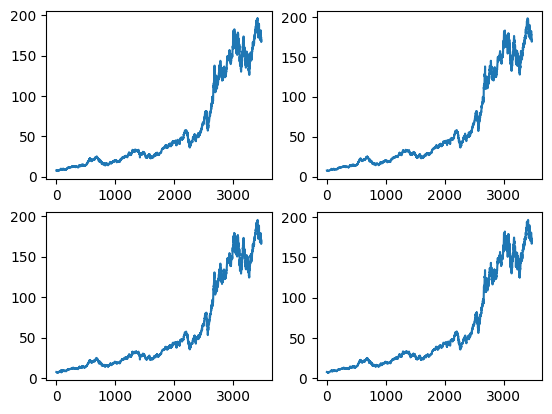

In [7]:
figure, axis = plt.subplots(2, 2)
axis[0, 0].plot(df.Open)
axis[0, 1].plot(df.High)
axis[1, 0].plot(df.Low)
axis[1, 1].plot(df.Close)


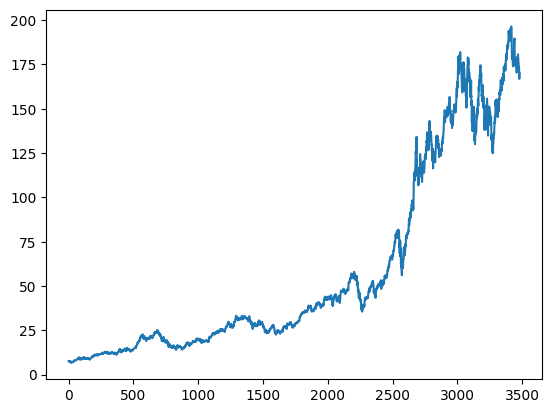

In [8]:
plt.plot(df.Close)

In [9]:
# averages
ma100 = df.Close.rolling(100).mean() # moving averages by n
ma200 = df.Close.rolling(200).mean() # moving averages by n


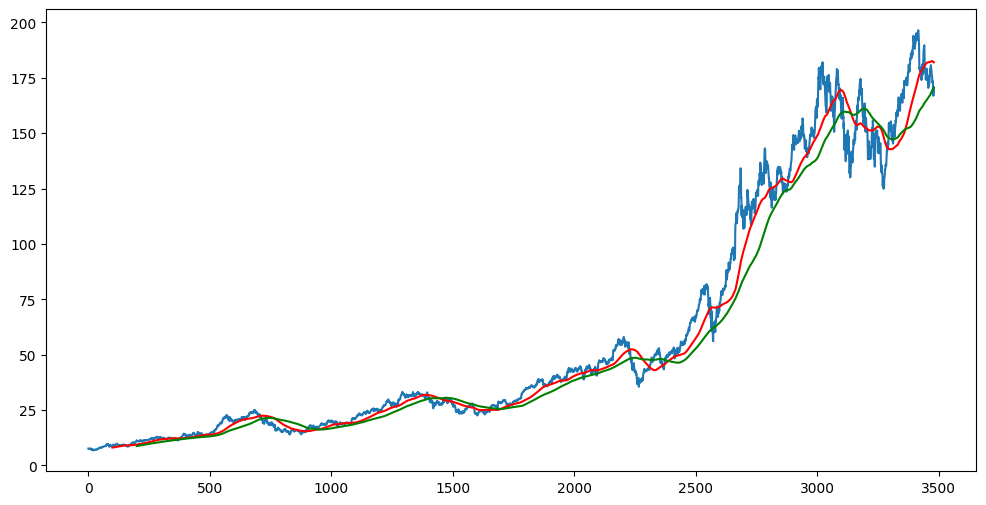

In [10]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')


In [11]:
df.shape

(3480, 5)

In [12]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2436, 1)
(1044, 1)


In [13]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [14]:
data_testing.head()

,Close
2436,53.542500
2437,54.174999
2438,55.897499
2439,55.772499
2440,54.687500


In [15]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.88819076],
       [0.90817762],
       [0.90807986]])

In [17]:
x_train = [data_training_array[i-100: i] for i in range(data_training_array.shape[0])] 
y_train = [data_training_array[i, 0] for i in range(data_training_array.shape[0])] 

# for i in range(100, data_training_array.shape[0]):
#   x_train.append(data_training_array[i-100: i]) # to start from 0
#   y_train.append([data_training_array[i, 0]])     # for the last element of each sequence


x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
# ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

2023-11-11 09:55:12.544605: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-11 09:55:12.628527: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-11 09:55:12.810959: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-11 09:55:12.810992: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-11 09:55:12.812070: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [19]:
model = Sequential()
model.add(LSTM(units= 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))

model.add(Dropout(0.2))

# SECOND LAYER

model.add(LSTM(units= 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

#THIRD LAYER

model.add(LSTM(units= 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

#FORTH LAYER

model.add(LSTM(units= 120, activation = 'relu'))
model.add(Dropout(0.5))


# Connect layers
model.add(Dense(units = 1))

2023-11-11 09:55:14.581504: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-11 09:55:14.592905: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [21]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
73/73 [==============================] - 6s 61ms/step - loss: 0.0307
Epoch 2/50
73/73 [==============================] - 4s 60ms/step - loss: 0.0077
Epoch 3/50
73/73 [==============================] - 5s 65ms/step - loss: 0.0063
Epoch 4/50
73/73 [==============================] - 5s 63ms/step - loss: 0.0055
Epoch 5/50
73/73 [==============================] - 5s 62ms/step - loss: 0.0055
Epoch 6/50
73/73 [==============================] - 5s 62ms/step - loss: 0.0046
Epoch 7/50
73/73 [==============================] - 5s 65ms/step - loss: 0.0047
Epoch 8/50
73/73 [==============================] - 4s 61ms/step - loss: 0.0048
Epoch 9/50
73/73 [==============================] - 5s 64ms/step - loss: 0.0041
Epoch 10/50
73/73 [==============================] - 5s 63ms/step - loss: 0.0043
Epoch 11/50
73/73 [==============================] - 5s 62ms/step - loss: 0.0038
Epoch 12/50
73/73 [==============================] - 5s 65ms/step - loss: 0.0035
Epoch 13/50
73/73 [==================

In [22]:
model.save('keras_model.h5')

/home/lucas/.pyenv/versions/3.8/envs/projects/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
data_testing.head()

,Close
2436,53.542500
2437,54.174999
2438,55.897499
2439,55.772499
2440,54.687500


In [24]:
past_100_days = data_training.tail(100)

In [31]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df.head()

,Close
0,49.812500
1,50.782501
2,50.965000
3,51.132500
4,51.869999


In [32]:
# Applying scale
input_data = scaler.fit_transform(final_df)
input_data

array([[0.04236734],
       [0.04870205],
       [0.04989387],
       ...,
       [0.80695511],
       [0.81564084],
       [0.82915916]])

In [34]:
input_data.shape

(1144, 1)

In [48]:
x_test = [input_data[i-100:i] for i in range(100, input_data.shape[0])]
y_test = [input_data[i, 0] for i in range(100, input_data.shape[0])]
print(x_test)
print(y_test)

[array([[0.04236734],
       [0.04870205],
       [0.04989387],
       [0.05098775],
       [0.05580407],
       [0.05528164],
       [0.05221224],
       [0.05061225],
       [0.05111836],
       [0.04468571],
       [0.06076735],
       [0.0585306 ],
       [0.06277551],
       [0.05743672],
       [0.04826122],
       [0.04832652],
       [0.04476735],
       [0.03898774],
       [0.02027755],
       [0.02507755],
       [0.02876734],
       [0.02739592],
       [0.02563265],
       [0.01598366],
       [0.02171429],
       [0.01547754],
       [0.01038367],
       [0.00925714],
       [0.00804897],
       [0.00666123],
       [0.00816327],
       [0.0028898 ],
       [0.        ],
       [0.01035101],
       [0.0150857 ],
       [0.01946122],
       [0.02751019],
       [0.03147755],
       [0.03511836],
       [0.03410612],
       [0.0340408 ],
       [0.03173878],
       [0.03361632],
       [0.04106122],
       [0.04011427],
       [0.04271021],
       [0.04159999],
       [0.04

In [49]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1044, 100, 1)
(1044,)


In [50]:
# Making predictions

y_predicted = model.predict(x_test)

33/33 [==============================] - 1s 27ms/step


In [51]:
y_predicted.shape

(1044, 1)

In [52]:
y_test

array([0.06672652, 0.07085713, 0.08210611, ..., 0.80695511, 0.81564084,
       0.82915916])

In [53]:
y_predicted

array([[0.11634955],
       [0.116514  ],
       [0.11673978],
       ...,
       [0.71909904],
       [0.71232915],
       [0.7051657 ]], dtype=float32)

In [54]:
# Scale up values again
scaler.scale_

array([0.00653061])

In [58]:
scale_factor = 1/scaler.scale_
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

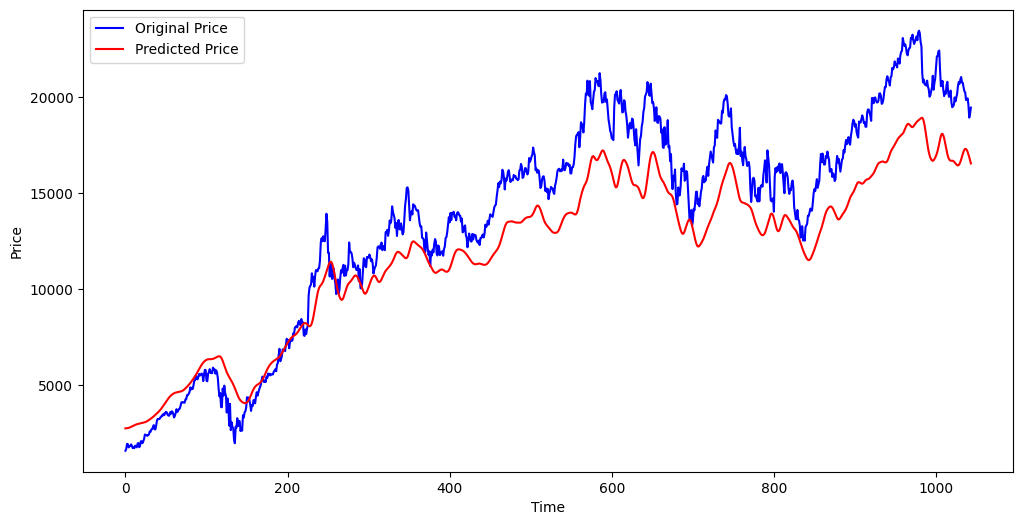

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()